## Manual Vehicle Detection


The goals / steps of this project are the following:

* Histogram of Oriented Gradients (HOG)
* Sliding Window Search


---
## Histogram of Oriented Gradients (HOG)




### Car vs Not-Car


In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog

# Read in our vehicles
car_images = glob.glob('KITTI_data/vehicles/*/*.png')
not_car_images = glob.glob('KITTI_data/non-vehicles/*/*.png')


print('Car images number:', len(car_images))
print('Not-car images number:', len(not_car_images))

# Generate a random index to look at a car image
ind_car = np.random.randint(0, len(car_images))
ind_not_car = np.random.randint(0, len(not_car_images))

car_img = mpimg.imread(car_images[ind_car])
not_car_img = mpimg.imread(not_car_images[ind_not_car])


# Plot Cars vs Not-Cars
fig = plt.figure(figsize=(25, 25))
plt.subplot(121)
plt.imshow(car_img, cmap='gray')
plt.title('Car', fontsize=40)
plt.subplot(122)
plt.imshow(not_car_img, cmap='gray')
plt.title('Not Car', fontsize=40)
plt.show()

Car images number: 8792
Not-car images number: 8968


### Explore different color spaces and hog parameters

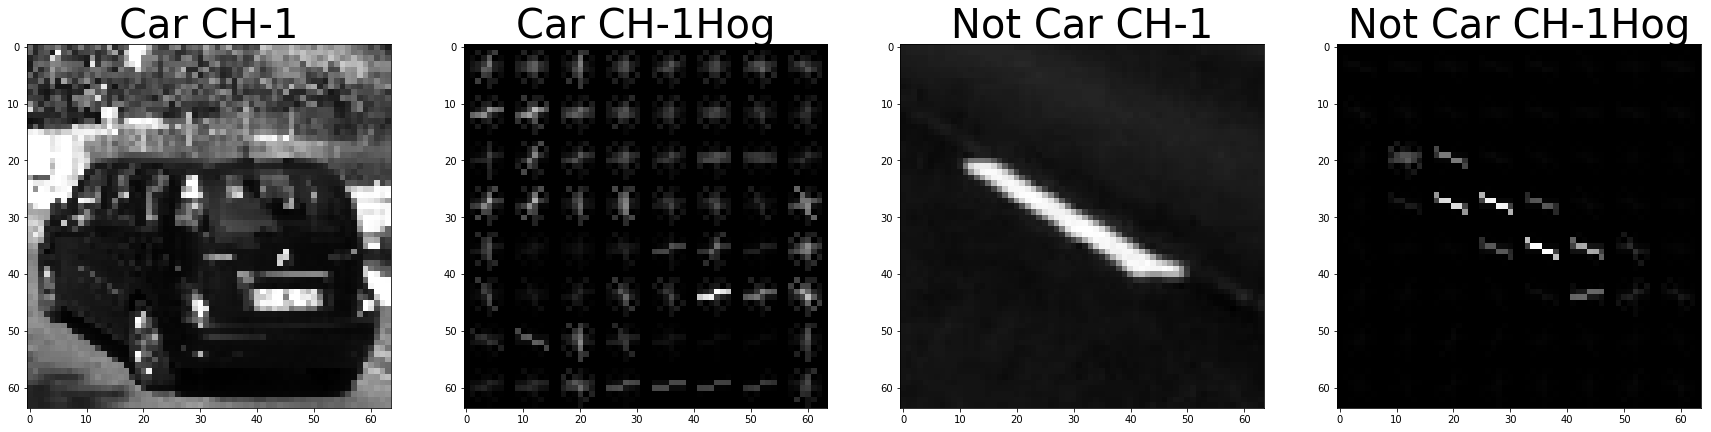

'\nnot_car_feature = cv2.cvtColor(not_car_img, cv2.COLOR_RGB2YCrCb)\ncar_feature = cv2.cvtColor(car_img, cv2.COLOR_RGB2YCrCb)\n\nfor i in range(3) :\n    car_img = car_feature[:,:,i]\n    not_car_img = not_car_feature[:,:,i]\n    plot_car_vs_not_car(car_img, not_car_img, i)\n'

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog

# Read in our vehicles
#car_images = glob.glob('data_exploration/cars1/*.jpeg')

        
# Define a function to return HOG features and visualization
# Features will always be the first element of the return
# Image data will be returned as the second element if visualize= True
# Otherwise there is no second return element

def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=True,
                     feature_vec=True):
                         
    """
    Function accepts params and returns HOG features (optionally flattened) and an optional matrix for 
    visualization. Features will always be the first return (flattened if feature_vector= True).
    A visualization matrix will be the second return if visualize = True.
    """
    
    return_list = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block),
                                  block_norm= 'L2-Hys', transform_sqrt=False, 
                                  visualise= vis, feature_vector= feature_vec)
    
    # name returns explicitly
    hog_features = return_list[0]
    if vis:
        hog_image = return_list[1]
        return hog_features, hog_image
    else:
        return hog_features

def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    # Return the feature vector
    return features
    

def plot_car_vs_not_car_hog(car_image, not_car_image, ch):
    gray_car = cv2.cvtColor(car_image, cv2.COLOR_RGB2GRAY)
    gray_not_car = cv2.cvtColor(not_car_image, cv2.COLOR_RGB2GRAY)
    # Call our function with vis=True to see an image output
    car_features, car_hog_image = get_hog_features(gray_car, orient= 9, 
                                pix_per_cell= 8, cell_per_block= 2, 
                                vis=True, feature_vec=False)

    not_car_features, not_car_hog_image = get_hog_features(gray_not_car, orient= 9, 
                                pix_per_cell= 8, cell_per_block= 2, 
                                vis=True, feature_vec=False)

    # Plot the examples
    fig = plt.figure(figsize=(30, 30))
    plt.subplot(141)
    plt.imshow(gray_car, cmap='gray')
    plt.title('Car CH-'+ str (ch+1), fontsize=40)
    plt.subplot(142)
    plt.imshow(car_hog_image, cmap='gray')
    plt.title('Car CH-'+ str (ch+1)+ 'Hog', fontsize=40)
    plt.subplot(143)
    plt.imshow(gray_not_car , cmap='gray')
    plt.title('Not Car CH-'+ str (ch+1), fontsize=40)
    plt.subplot(144)
    plt.imshow(not_car_hog_image, cmap='gray')
    plt.title('Not Car CH-'+ str (ch+1)+ 'Hog', fontsize=40)
    plt.show()    

plot_car_vs_not_car_hog(car_img, not_car_img, 0)

'''
not_car_feature = cv2.cvtColor(not_car_img, cv2.COLOR_RGB2YCrCb)
car_feature = cv2.cvtColor(car_img, cv2.COLOR_RGB2YCrCb)

for i in range(3) :
    car_img = car_feature[:,:,i]
    not_car_img = not_car_feature[:,:,i]
    plot_car_vs_not_car(car_img, not_car_img, i)
'''
    
    



### Explore Color Spaces


(32, 32)


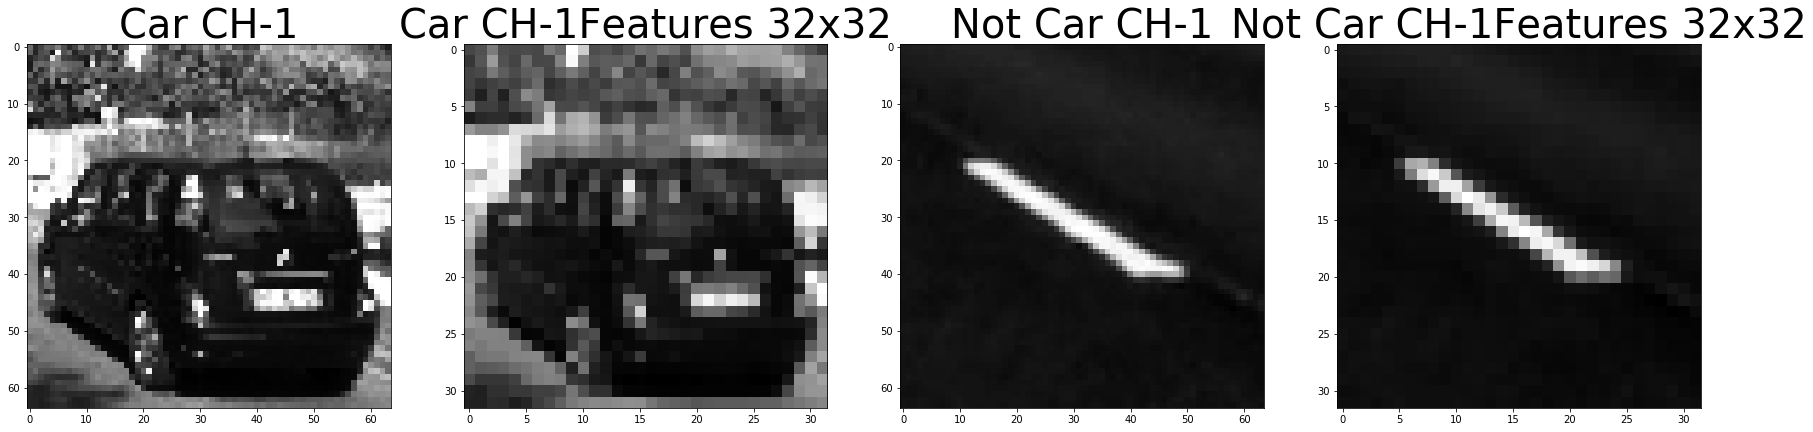

(32, 32)


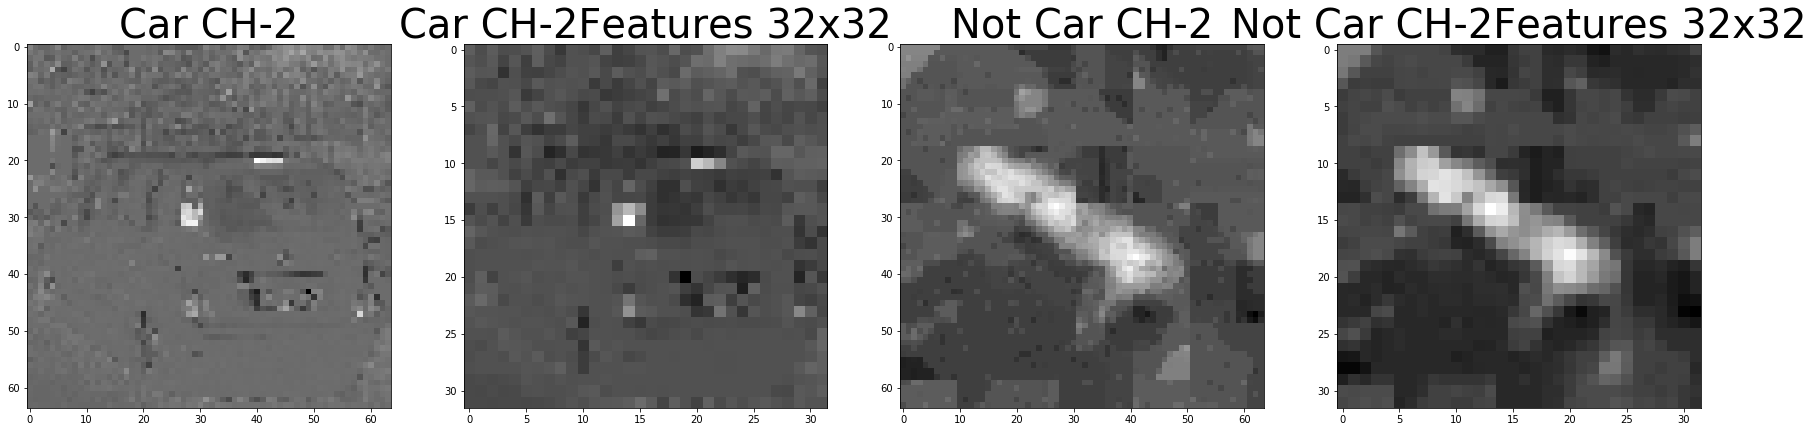

(32, 32)


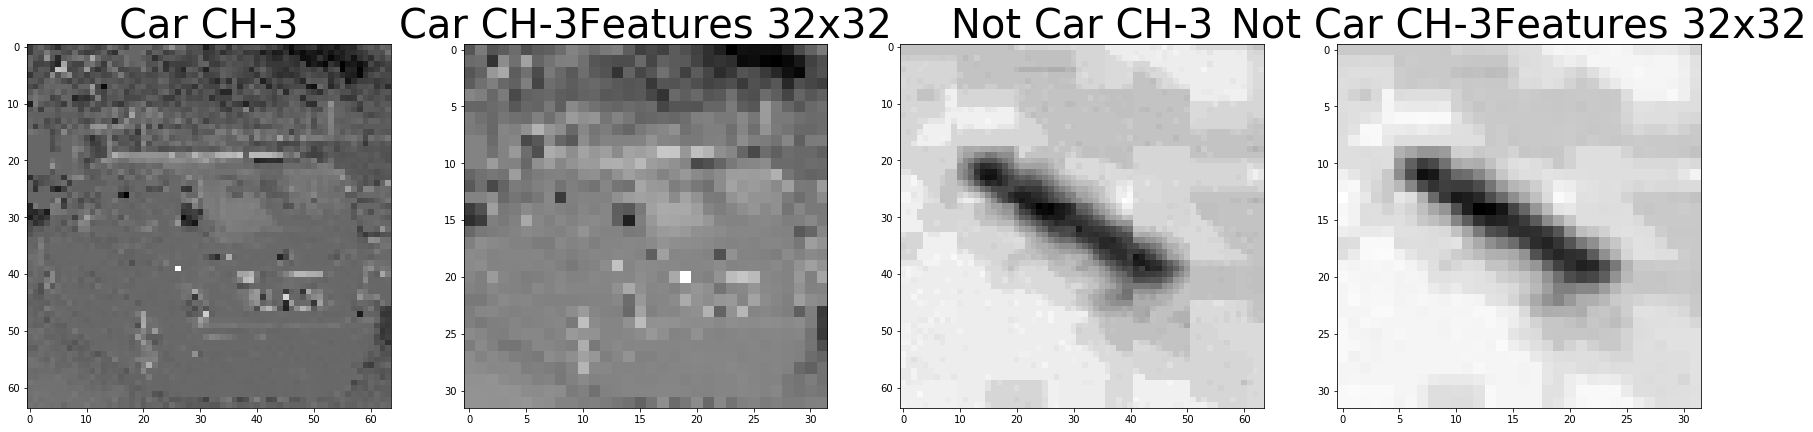

In [3]:
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)             
    # Use cv2.resize().ravel() to create the feature vector
    #features = cv2.resize(feature_image, size).ravel() 
    resize_features = cv2.resize(feature_image, size) 
    # Return the feature vector
    return feature_image, resize_features


feature_car_vec, resize_feature_car_vec = bin_spatial(car_img, color_space='YCrCb', size=(32, 32))
feature_not_car_vec, resize_feature_not_car_vec = bin_spatial(not_car_img, color_space='YCrCb', size=(32, 32))


for ch in range(3) :
    car_img = feature_car_vec[:,:,ch]
    not_car_img = feature_not_car_vec[:,:,ch]
    resize_car_img = resize_feature_car_vec[:,:,ch]
    resize_not_car_img = resize_feature_not_car_vec[:,:,ch]

    print(resize_car_img.shape)
    # Plot the examples
    fig = plt.figure(figsize=(30, 30))
    plt.subplot(141)
    plt.imshow(car_img, cmap='gray')
    plt.title('Car CH-'+ str (ch+1), fontsize=40)
    plt.subplot(142)
    plt.imshow(resize_car_img, cmap='gray')
    plt.title('Car CH-'+ str (ch+1)+ 'Features 32x32', fontsize=40)
    plt.subplot(143)
    plt.imshow(not_car_img , cmap='gray')
    plt.title('Not Car CH-'+ str (ch+1), fontsize=40)
    plt.subplot(144)
    plt.imshow(resize_not_car_img, cmap='gray')
    plt.title('Not Car CH-'+ str (ch+1)+ 'Features 32x32', fontsize=40)
    plt.show()    

## scikit-image HOG

http://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=feature%20hog#skimage.feature.hog

## search and classify


In [4]:
# Define a function to extract features from a list of image locations
# This function could also be used to call bin_spatial() and color_hist() (as in the lessons) to extract
# flattened spatial color features and color histogram features and combine them all (making use of StandardScaler)
# to be used together for classification
def extract_features_test(imgs, color_space='RGB', orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        # Call get_hog_features() with vis=False, feature_vec=True
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))
            hog_features = np.ravel(hog_features)        
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        # Append the new feature vector to the features list
        features.append(hog_features)
    # Return list of feature vectors
    return features

colorspace = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 11
pix_per_cell = 16
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

'''
t = time.time()
car_features = extract_features(cars, color_space=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features(noncars, color_space=colorspace, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
'''

'\nt = time.time()\ncar_features = extract_features(cars, color_space=colorspace, orient=orient, \n                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, \n                        hog_channel=hog_channel)\nnotcar_features = extract_features(noncars, color_space=colorspace, orient=orient, \n                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, \n                        hog_channel=hog_channel)\n'

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from lesson_functions import *
# NOTE: the next import is only valid for scikit-learn version <= 0.17
# for scikit-learn >= 0.18 use:
# from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        #print(np.array(features).shape)
        #print(np.array(features).reshape(1, -1).shape)
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        
        
        
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows
    
    

car_images = glob.glob('KITTI_data/vehicles/*/*.png')
not_car_images = glob.glob('KITTI_data/non-vehicles/*/*.png')

# Read in cars and notcars
#images = glob.glob('data_exploration/*/*.jpeg')
cars = []
notcars = []
for image in car_images:
    cars.append(image)
    
for image in not_car_images:
    notcars.append(image)

        
# Reduce the sample size because
# The quiz evaluator times out after 13s of CPU time
#sample_size = 500
#cars = cars[0:sample_size]
#notcars = notcars[0:sample_size]

### TODO: Tweak these parameters and see how the results change.
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 11  # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()


car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

#orient = 11
#pix_per_cell = 16
#cell_per_block = 2
#hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"

'''
car_features = extract_features(cars, color_space=color_space, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
notcar_features = extract_features(notcars, color_space=color_space, orient=orient, 
                        pix_per_cell=pix_per_cell, cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)
'''
#print(car_features.shape)
#print(notcar_features.shape)
# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)
print(X.shape)
# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)
    
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
print(X_train.shape)
print(X_test.shape)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()



/home/kslin/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(17760, 4356)
(14208, 4356)
(3552, 4356)
Using: 11 orientations 16 pixels per cell and 2 cells per block
Feature vector length: 4356
8.63 Seconds to train SVC...
Test Accuracy of SVC =  0.9859


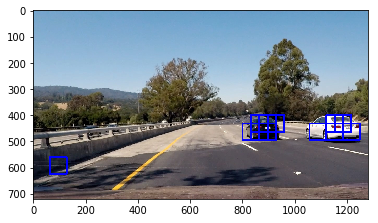

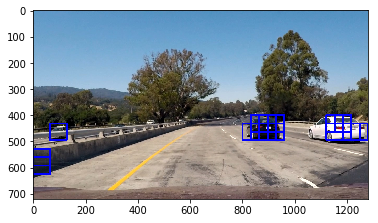

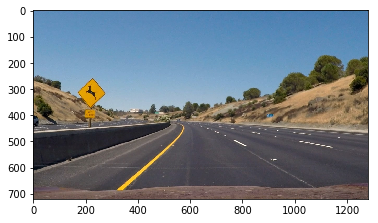

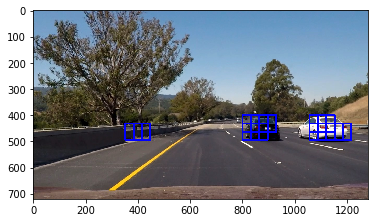

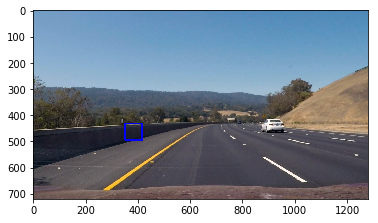

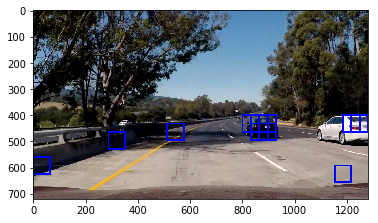

In [6]:
# Make a list of calibration images
images = glob.glob('test_images/test*.jpg')


ystart = 400
ystop = 656
y_start_stop = [ystart, ystop]

for fname in images:
    image = mpimg.imread(fname)

    #image = mpimg.imread('test_images/test1.jpg')
    draw_image = np.copy(image)

    # Uncomment the following line if you extracted training
    # data from .png images (scaled 0 to 1 by mpimg) and the
    # image you are searching is a .jpg (scaled 0 to 255)
    image = image.astype(np.float32)/255

    windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5))
    #print (windows[0:10])
    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)                       

    window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

    plt.imshow(window_img)
    plt.show()

In [8]:
def convert_color(img, conv='RGB2YCrCb'):
    if conv == 'RGB2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    if conv == 'BGR2YCrCb':
        return cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    if conv == 'RGB2LUV':
        return cv2.cvtColor(img, cv2.COLOR_RGB2LUV)


### Hog Sub-sampling Window Search

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
StandardScaler(copy=True, with_mean=True, with_std=True)
11
16
2
(32, 32)
32
processing............................


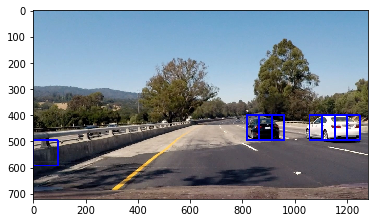

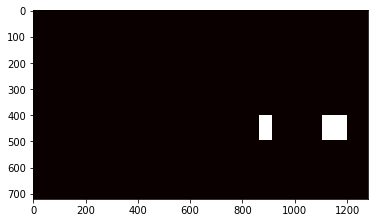

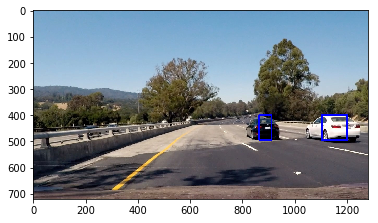

processing............................


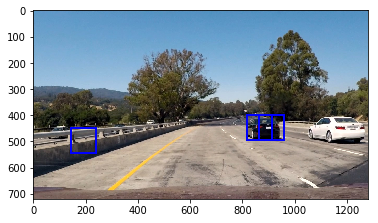

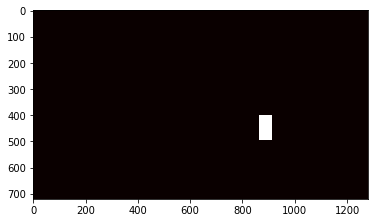

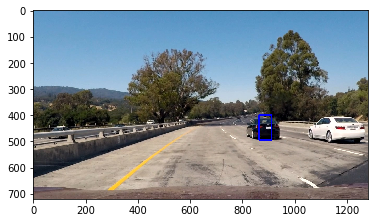

processing............................


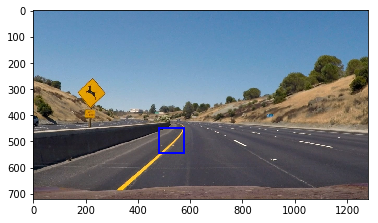

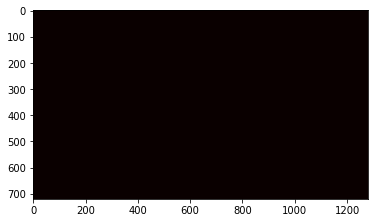

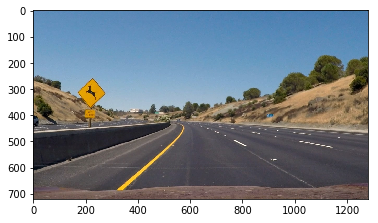

processing............................


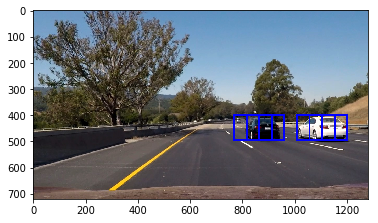

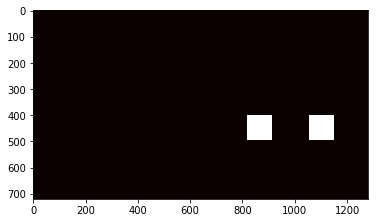

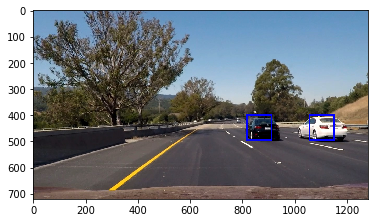

processing............................


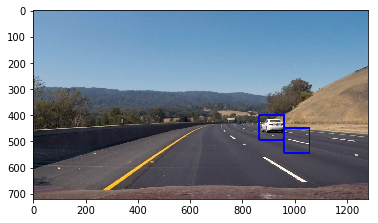

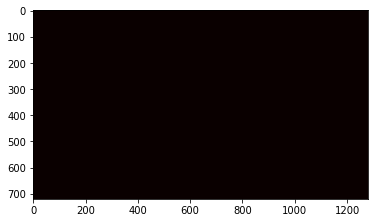

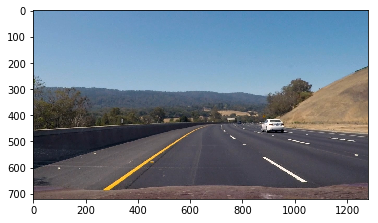

processing............................


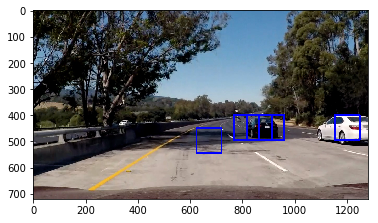

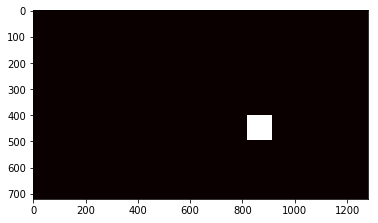

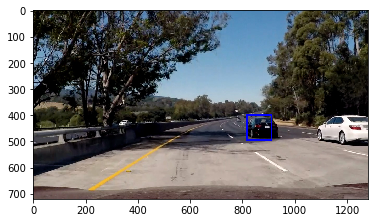

In [27]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
#from lesson_functions_2 import *

# load a pe-trained svc model from a serialized (pickle) file

#dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )

print(svc)
print(X_scaler)
print(orient)
print(pix_per_cell)
print(cell_per_block)
print(spatial_size)
print(hist_bins)

'''
# get attributes of our svc object
#svc = dist_pickle["svc"]
#X_scaler = dist_pickle["scaler"]

print('================================')
print(dist_pickle["scaler"])

print(dist_pickle["svc"])
print(dist_pickle["scaler"])
print(dist_pickle["orient"])
print(dist_pickle["pix_per_cell"])
print(dist_pickle["cell_per_block"])
print(dist_pickle["spatial_size"])
print(dist_pickle["hist_bins"])
'''

#orient = dist_pickle["orient"]
#pix_per_cell = dist_pickle["pix_per_cell"]
#cell_per_block = dist_pickle["cell_per_block"]
#spatial_size = dist_pickle["spatial_size"]
#hist_bins = dist_pickle["hist_bins"]

images = glob.glob('test_images/test*.jpg')




# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    img_boxes = []
    count = 0
    draw_img = np.copy(img)
    #Make a heatmap of zeros
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    img = img.astype(np.float32)/255
    
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell) - cell_per_block + 1
    nyblocks = (ch1.shape[0] // pix_per_cell) - cell_per_block + 1 
    nfeat_per_block = orient*cell_per_block**2
    
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell) - cell_per_block + 1
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step + 1
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step + 1
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    print('processing............................')
    #print(nxsteps)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            #print(xb)
            #print(yb)
            
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (32,32))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            total = np.hstack((spatial_features, hist_features, hog_features))
            
            
            
            
            
            '''
            print('find_cars')
            print(spatial_features.shape)
            print(hist_features.shape)
            print(hog_features.shape)
            print(total.shape)
            '''
            #print(X_scaler.transform(total.reshape(1, -1)).shape)
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            '''
            test_feature_2 = extract_features(cars, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
            '''
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                heat[ytop_draw+ystart:ytop_draw+ystart+win_draw, xbox_left : xbox_left+win_draw]+=1
                #plt.imshow(heat, cmap='hot')
                #plt.show()
                
    return draw_img, heat
    


### TODO: Tweak these parameters and see how the results change.
### TODO: Tweak these parameters and see how the results change.
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 11  # HOG orientations
pix_per_cell = 16 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
#y_start_stop = [None, None] # Min and max in y to search in slide_window()

# Make a list of calibration images
ystart = 400
ystop = 656
scale = 1.5

for fname in images:
    img = mpimg.imread(fname)
    out_img, heat = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    plt.imshow(out_img)
    plt.show()
    
    plt.imshow(heatmap, cmap='hot')
    heat = apply_threshold(heat,1)
    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat, 0, 255)
    plt.imshow(heatmap, cmap='hot')
    plt.show()
    

    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(img), labels)
    plt.imshow(draw_img)
    plt.show()
    

### Multiple Detections & False Positives



[((800, 400), (900, 500)), ((850, 400), (950, 500)), ((1050, 400), (1150, 500)), ((1100, 400), (1200, 500)), ((1150, 400), (1250, 500)), ((875, 400), (925, 450)), ((1075, 400), (1125, 450)), ((825, 425), (875, 475)), ((814, 400), (889, 475)), ((851, 400), (926, 475)), ((1073, 400), (1148, 475)), ((1147, 437), (1222, 512)), ((1184, 437), (1259, 512)), ((400, 400), (500, 500))]


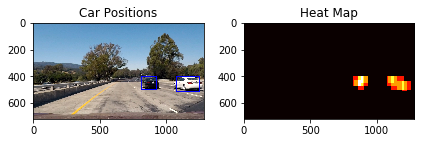

In [16]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from scipy.ndimage.measurements import label

# Read in a pickle file with bboxes saved
# Each item in the "all_bboxes" list will contain a 
# list of boxes for one of the images shown above
box_list = pickle.load( open( "bbox_pickle.p", "rb" ))
print(box_list)
# Read in image similar to one shown above 
#image = mpimg.imread('test_image.jpg')
image = mpimg.imread('test_images/test1.jpg')

heat = np.zeros_like(image[:,:,0]).astype(np.float)

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

# Add heat to each box in box list
heat = add_heat(heat,box_list)
    
# Apply threshold to help remove false positives
heat = apply_threshold(heat,1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)
draw_img = draw_labeled_bboxes(np.copy(image), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

## Tracking pipeline

In [33]:
def process_image(image):
    
    
    out_img, heat = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    
    heat = apply_threshold(heat,1)
    heatmap = np.clip(heat, 0, 255)
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    return draw_img

## Test on Videos

### Input: project_video.mp4


In [34]:
# Import everything needed to edit/save/watch video clips
import imageio
imageio.plugins.ffmpeg.download()
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [35]:
#input_video = 'project_video.mp4'
input_video = 'test_video.mp4'
#input_video = '../challenge_video.mp4'
output_video = 'test_video_out.mp4'


clip1 = VideoFileClip(input_video)
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output_video, audio=False)



processing............................
[MoviePy] >>>> Building video test_video_out.mp4
[MoviePy] Writing video test_video_out.mp4


  0%|          | 0/39 [00:00<?, ?it/s]

processing............................


  3%|▎         | 1/39 [00:00<00:05,  6.81it/s]

processing............................


  8%|▊         | 3/39 [00:00<00:05,  6.53it/s]

processing............................


 10%|█         | 4/39 [00:00<00:05,  6.73it/s]

processing............................
processing............................


 13%|█▎        | 5/39 [00:00<00:05,  6.49it/s]

processing............................


 15%|█▌        | 6/39 [00:00<00:05,  6.50it/s]

processing............................


 21%|██        | 8/39 [00:01<00:04,  6.68it/s]

processing............................


 23%|██▎       | 9/39 [00:01<00:04,  6.82it/s]

processing............................
processing............................


 26%|██▌       | 10/39 [00:01<00:04,  6.71it/s]

processing............................


 28%|██▊       | 11/39 [00:01<00:04,  6.65it/s]

processing............................


 31%|███       | 12/39 [00:01<00:04,  6.21it/s]

processing............................


 33%|███▎      | 13/39 [00:02<00:04,  6.04it/s]

processing............................


 36%|███▌      | 14/39 [00:02<00:04,  6.22it/s]

processing............................


 38%|███▊      | 15/39 [00:02<00:03,  6.27it/s]

processing............................


 41%|████      | 16/39 [00:02<00:03,  6.39it/s]

processing............................


 44%|████▎     | 17/39 [00:02<00:03,  6.17it/s]

processing............................


 46%|████▌     | 18/39 [00:02<00:03,  5.87it/s]

processing............................


 49%|████▊     | 19/39 [00:03<00:03,  6.14it/s]

processing............................


 51%|█████▏    | 20/39 [00:03<00:03,  5.87it/s]

processing............................


 54%|█████▍    | 21/39 [00:03<00:03,  5.89it/s]

processing............................


 56%|█████▋    | 22/39 [00:03<00:02,  6.12it/s]

processing............................


 59%|█████▉    | 23/39 [00:03<00:02,  5.88it/s]

processing............................


 62%|██████▏   | 24/39 [00:03<00:02,  5.84it/s]

processing............................


 64%|██████▍   | 25/39 [00:04<00:02,  6.07it/s]

processing............................


 67%|██████▋   | 26/39 [00:04<00:02,  6.07it/s]

processing............................


 69%|██████▉   | 27/39 [00:04<00:02,  5.93it/s]

processing............................


 72%|███████▏  | 28/39 [00:04<00:01,  6.18it/s]

processing............................


 74%|███████▍  | 29/39 [00:04<00:01,  6.19it/s]

processing............................


 77%|███████▋  | 30/39 [00:04<00:01,  6.12it/s]

processing............................


 79%|███████▉  | 31/39 [00:04<00:01,  6.32it/s]

processing............................


 85%|████████▍ | 33/39 [00:05<00:00,  6.37it/s]

processing............................


 87%|████████▋ | 34/39 [00:05<00:00,  6.66it/s]

processing............................


 90%|████████▉ | 35/39 [00:05<00:00,  6.84it/s]

processing............................


 92%|█████████▏| 36/39 [00:05<00:00,  6.96it/s]

processing............................


 95%|█████████▍| 37/39 [00:05<00:00,  7.02it/s]

processing............................


 97%|█████████▋| 38/39 [00:05<00:00,  7.08it/s]

processing............................


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_video_out.mp4 

CPU times: user 12.5 s, sys: 107 ms, total: 12.7 s
Wall time: 6.64 s


In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_video))

In [ ]:
input_video = '../challenge_video.mp4'
clip2 = VideoFileClip(input_video)
output_video = '../challenge_video_output.mp4'
white_clip = clip2.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output_video, audio=False)




